In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
!pip install nltk

In [6]:
# create column names
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
# load the data
df.head()
df = pd.read_csv(r"C:\Users\Sakshi\Downloads\Sentiment_Analysis_for_Brand_Perception-TWITTER-main (1)\Sentiment_Analysis_for_Brand_Perception-TWITTER-main\twitter_training.csv", names = col_names)
df

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
# Check Data Dimensions
df.shape

(74682, 4)

In [10]:
df.dtypes


ID            int64
Entity       object
Sentiment    object
Content      object
dtype: object

In [11]:
# check for missing values
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [ ]:
#handling missing values 
# dropping the rows with content missing values
df.dropna(subset = ['Content'],inplace=True)

In [ ]:
# Count the total number of duplicate rows
total_duplicates = df[df.duplicated(keep='first')].shape[0]

print("Total duplicate rows:", total_duplicates)

In [48]:
# Check for duplicates with different labels
df_duplicates = df[df.duplicated(subset=['Content'], keep=False)]
print(df_duplicates)


         ID       Entity Sentiment  \
11     2402  Borderlands  Positive   
18     2404  Borderlands  Positive   
20     2404  Borderlands  Positive   
25     2405  Borderlands  Negative   
26     2405  Borderlands  Negative   
...     ...          ...       ...   
74616  9190       Nvidia  Positive   
74619  9190       Nvidia  Positive   
74621  9190       Nvidia  Positive   
74635  9193       Nvidia  Positive   
74636  9193       Nvidia  Positive   

                                                 Content  \
11                                                   was   
18     that was the first borderlands session in a lo...   
20     that was the first borderlands session in a lo...   
25     The biggest disappointment of my life came a y...   
26     The biggest disappointment of my life came a y...   
...                                                  ...   
74616  This news about the Nvidia 3000 series is ligi...   
74619  This news about the Nvidia 3000 series is ligi...   
746

In [ ]:
# Drop duplicate rows
df.drop_duplicates(keep='first', inplace=True)

# Reset the index after dropping duplicates
df.reset_index(drop=True, inplace=True)

In [13]:
# replace irrelevant to neutral
df['Sentiment'] = df['Sentiment'].replace('Irrelevant', 'Neutral')

In [14]:
df.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

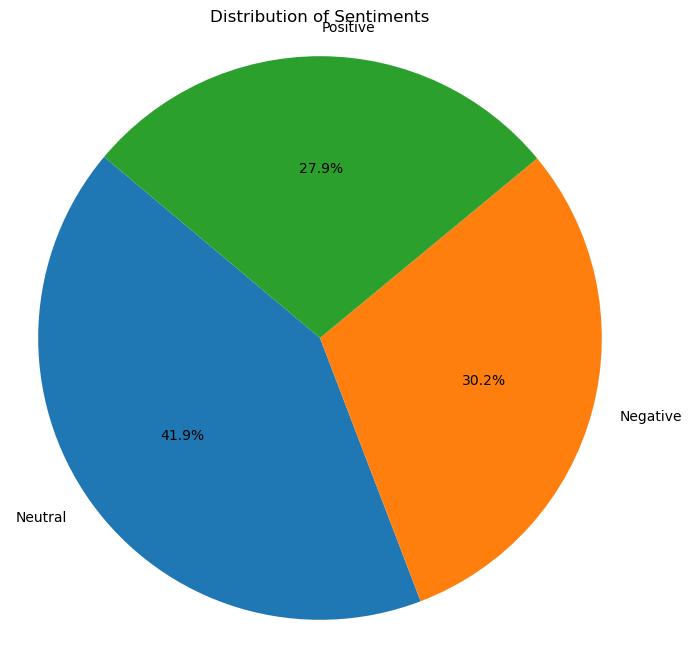

In [22]:
# Calculate the distribution of sentiments
sentiment_distribution = df['Sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the pie chart 42.2
plt.show()

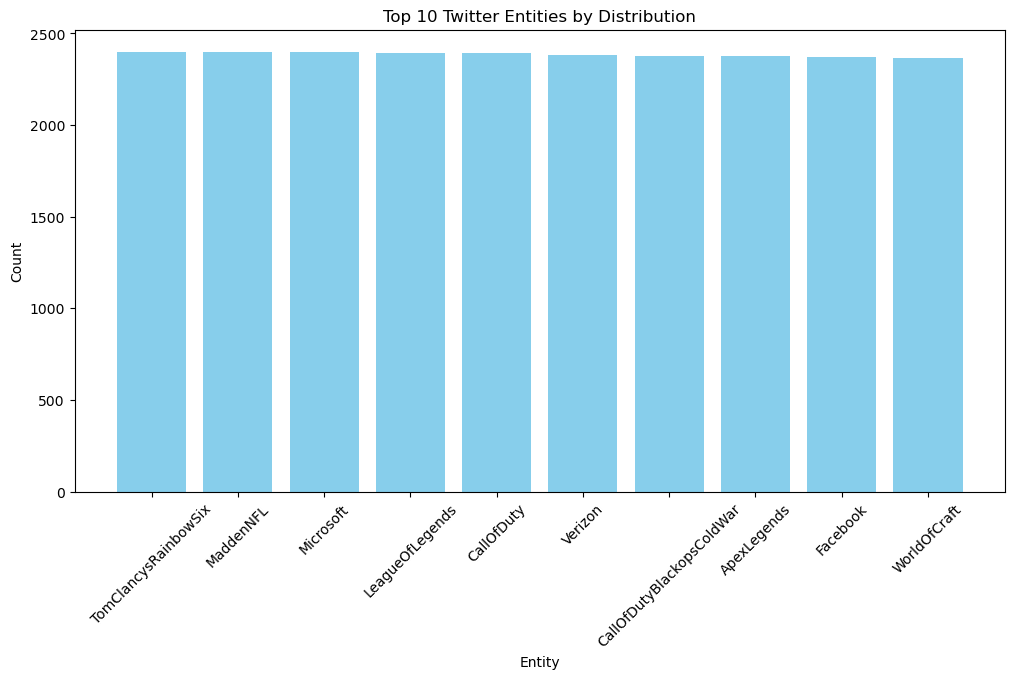

In [25]:
# Calculate the distribution of entities
entity_distribution = df['Entity'].value_counts()

# Select the top 10 entities
top_10_entities = entity_distribution.head(10)

# Create a bar chart for the top 10 entities
plt.figure(figsize=(12, 6))
plt.bar(top_10_entities.index, top_10_entities.values, color='skyblue')
plt.title('Top 10 Twitter Entities by Distribution')
plt.xlabel('Entity')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the bar chart
plt.show()

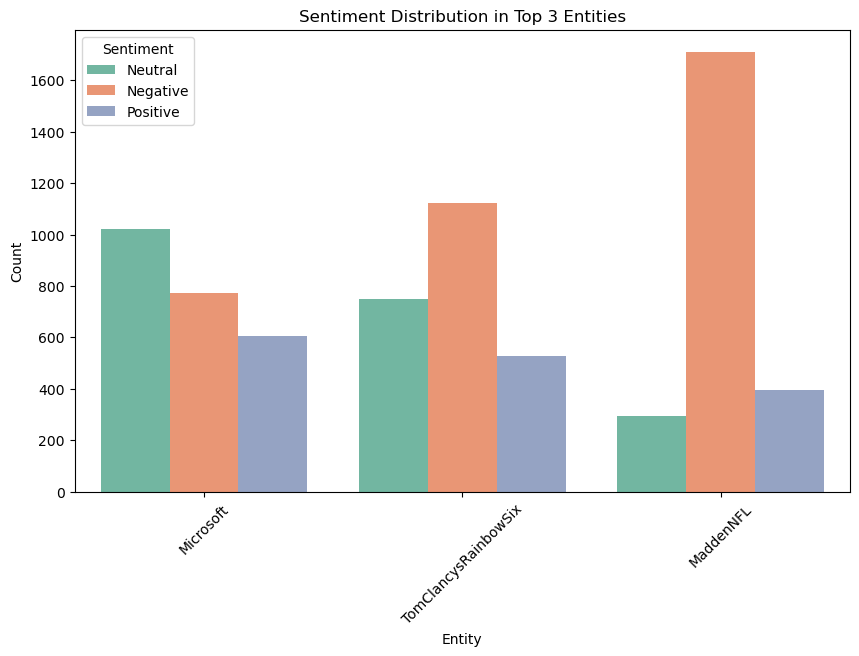

In [26]:
# Calculate the distribution of entities
entity_distribution = df['Entity'].value_counts()

# Select the top 3 entities
top_3_entities = entity_distribution.head(3).index

# Filter the DataFrame to include only the top 3 entities
df_top_3 = df[df['Entity'].isin(top_3_entities)]

# Create a grouped bar chart for sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_3, x='Entity', hue='Sentiment', palette='Set2')
plt.title('Sentiment Distribution in Top 3 Entities')
plt.xlabel('Entity')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the grouped bar chart
plt.show()

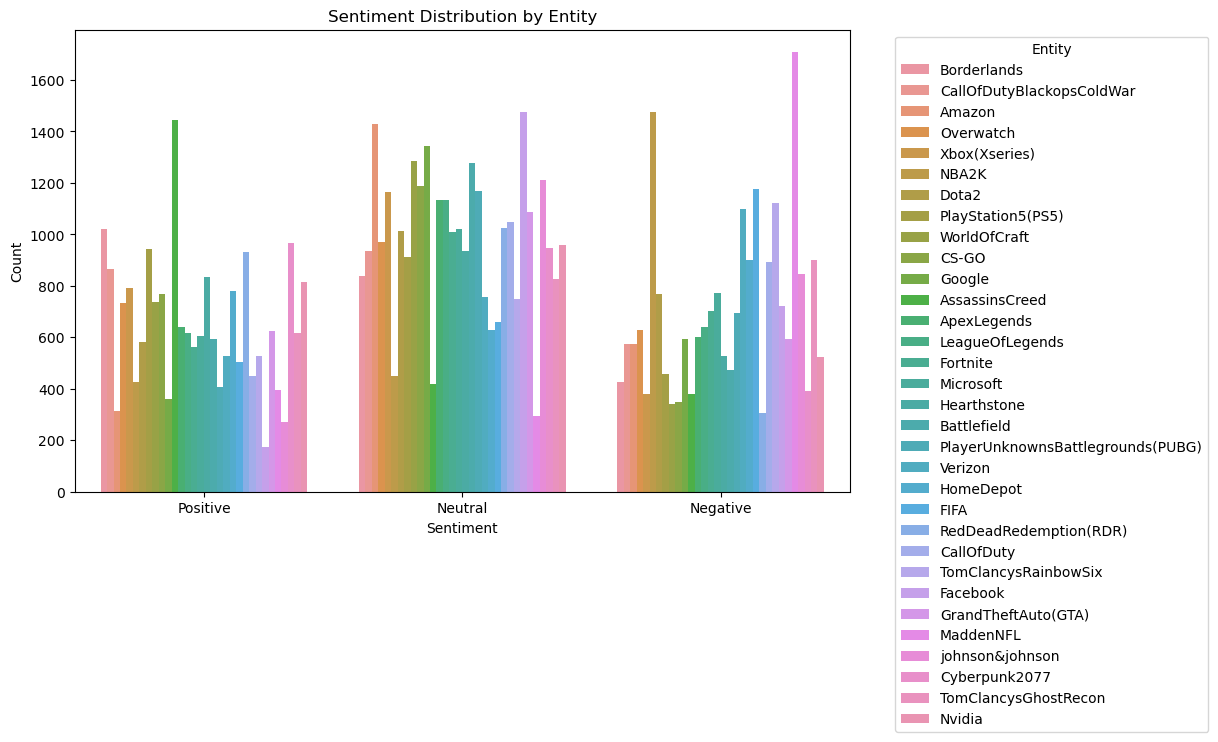

In [27]:
# Example for sentiment distribution by entity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', hue='Entity')
plt.title("Sentiment Distribution by Entity")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend(title='Entity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [31]:
# Make sure NLTK stopwords and lemmatizer are downloaded
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text with lemmatization and stopwords removal
def preprocess_text(text):
    if isinstance(text, str):  # Only process if it's a string
        # Remove special characters, numbers, and links
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = text.lower()  # Convert to lowercase
        tokens = nltk.word_tokenize(text)
        tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize words
        tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
        return ' '.join(tokens)
    else:
        return ''  # Return an empty string for non-string values (e.g., NaN)

# Apply preprocessing with lemmatization and stopwords removal to the 'Content' column
df['Cleaned_Content'] = df['Content'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [32]:
df['Cleaned_Content']

0                             im getting borderland murder
1                                       coming border kill
2                               im getting borderland kill
3                              im coming borderland murder
4                             im getting borderland murder
                               ...                        
74677    realized window partition mac like year behind...
74678    realized mac window partition year behind nvid...
74679    realized window partition mac year behind nvid...
74680    realized window partition mac like year behind...
74681    like window partition mac like year behind dri...
Name: Cleaned_Content, Length: 74682, dtype: object

In [33]:
# loading vader to perform sentiment analysis
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer without specifying the lexicon file
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Apply sentiment analysis to the 'Cleaned_Content' column
df['Sentiment_Score'] = df['Cleaned_Content'].apply(get_sentiment_scores)

# Categorize sentiment based on the compound score
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment categorization
df['Sentiment_Predicted'] = df['Sentiment_Score'].apply(categorize_sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sakshi\AppData\Roaming\nltk_data...


In [34]:
df['Sentiment_Predicted']

0        Negative
1        Negative
2        Negative
3        Negative
4        Negative
           ...   
74677    Positive
74678     Neutral
74679     Neutral
74680    Positive
74681    Positive
Name: Sentiment_Predicted, Length: 74682, dtype: object

In [36]:
df

,ID,Entity,Sentiment,Content,Cleaned_Content,Sentiment_Score,Sentiment_Predicted
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderland murder,-0.6908,Negative
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming border kill,-0.6908,Negative
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderland kill,-0.6908,Negative
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderland murder,-0.6908,Negative
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderland murder,-0.6908,Negative
...,...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized window partition mac like year behind...,0.3612,Positive
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition year behind nvid...,0.0000,Neutral
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized window partition mac year behind nvid...,0.0000,Neutral
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,realized window partition mac like year behind...,0.3612,Positive


In [38]:
from sklearn.metrics import classification_report

# Compare VADER predicted sentiment with true labels
print(classification_report(df['Sentiment'], df['Sentiment_Predicted']))


              precision    recall  f1-score   support

    Negative       0.46      0.54      0.50     22542
     Neutral       0.44      0.19      0.27     31308
    Positive       0.40      0.66      0.50     20832

    accuracy                           0.43     74682
   macro avg       0.43      0.47      0.42     74682
weighted avg       0.44      0.43      0.40     74682



In [39]:
# Assign the variables
X = df['Cleaned_Content']  # Features
y = df['Sentiment_Predicted']  # Target
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# converting the text data to numerical featurees

tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [44]:
# Initialize the model
model = LogisticRegression(max_iter=1000, solver='saga')

# Train the model
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [45]:
# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9128339023900381
              precision    recall  f1-score   support

    Negative       0.91      0.90      0.90      5252
     Neutral       0.90      0.87      0.88      2688
    Positive       0.92      0.94      0.93      6997

    accuracy                           0.91     14937
   macro avg       0.91      0.90      0.91     14937
weighted avg       0.91      0.91      0.91     14937

